<a href="https://colab.research.google.com/github/JcMN/Machine-Learning/blob/main/Assigment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Motivation for the selected dataset

  The dataset selected was the Stellar Classification Dataset. The main reason for the selection of this dataset is that astronomy has always been a passion of mine, more specifically astrophysics but still. The dataset contains information of stars that can be used to classify stars based on their spectral characteristics, making it perfect for trying a first machine learning assignment. It is also an interesting topic for me and I'm looking forward to analyse it on the 2nd Assignment.

2. Objective and Approach
  
  The objective is to apply the concepts learned in class on the dataset and see how efective is the initial model chosen compared to other models being analyzed. The work produced here is to be continued on future assignments.
  
  The approach will be to first analyze and train a Logistic Model with the data, applying all concepts to garuantee the best accuracy, and then apply ohter models to see differences in prediction accuracies. Logistic Regression was chosen out of curiosity with Decision Trees and KNNeighbours being the comparison models. I want to see how different classifiers can have different results when compared with each other using the same data.

3. Describe the data, visualize and analyze the data

  The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

  obj_ID = Object Identifier, the unique value that identifies the

  object in the image catalog used by the CAS

  alpha = Right Ascension angle (at J2000 epoch)

  delta = Declination angle (at J2000 epoch)

  u = Ultraviolet filter in the photometric system

  g = Green filter in the photometric system

  r = Red filter in the photometric system

  i = Near Infrared filter in the photometric system

  z = Infrared filter in the photometric system

  run_ID = Run Number used to identify the specific scan

  rereun_ID = Rerun Number to specify how the image was processed

  cam_col = Camera column to identify the scanline within the run

  field_ID = Field number to identify each field
  
  spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)

  class = object class (galaxy, star or quasar object)

  redshift = redshift value based on the increase in wavelength

  plate = plate ID, identifies each plate in SDSS

  MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken

  fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

  *Descriptions taken directly from:

  fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [Date Retrieved] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

In [ ]:
#Importing relevant libraries
import numpy as nump
import pandas as pa

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve, validation_curve
#from sklearn.model_selection import ValidationCurveDisplay, LearningCurveDisplay
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier



In [ ]:
#Showing Data Information form the dataset
data = pa.read_csv("../content/star_classification.csv")

data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [ ]:
data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [ ]:
data.tail()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470
99999,1.237661e+18,196.896053,49.464643,22.62171,21.79745,20.60115,20.00959,19.28075,3650,301,4,60,8.343152e+18,GALAXY,0.542944,7410,57104,851


In [ ]:
data.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [ ]:
#Check if any data is null
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

Some data visualization, mainly based on the class of the object

<ipython-input-7-8942553aa3a8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['class'], palette="Set1")


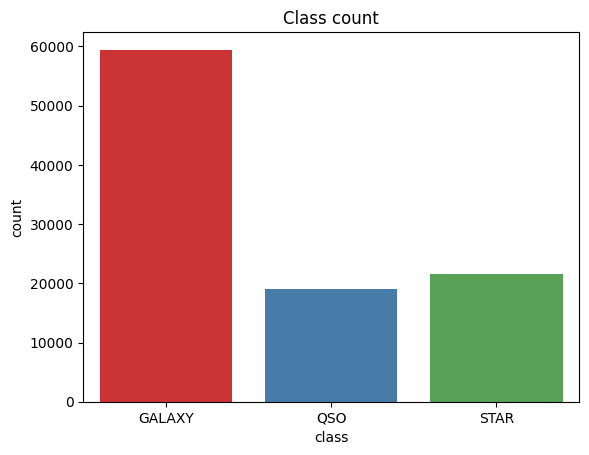

In [ ]:
#In the following graph, it will show the amounts of data entries sorted by class

sns.countplot(x=data['class'], palette="Set1")
plt.title("Class count", fontsize = 12)
plt.show()

<ipython-input-28-f069cee080c5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='alpha', y='class', inner='box', palette='Dark2')


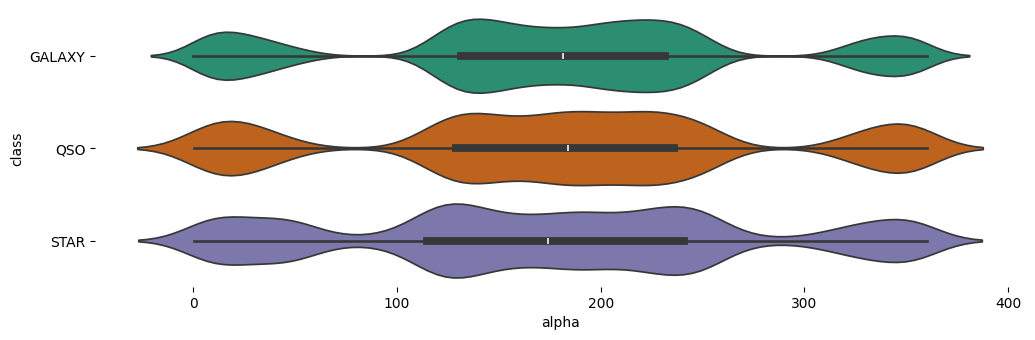

In [ ]:
#class vs alpha - automatically done by Colab
figsize = (12, 1.2 * len(data['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='alpha', y='class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-29-7775d77718db>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='delta', y='class', inner='box', palette='Dark2')


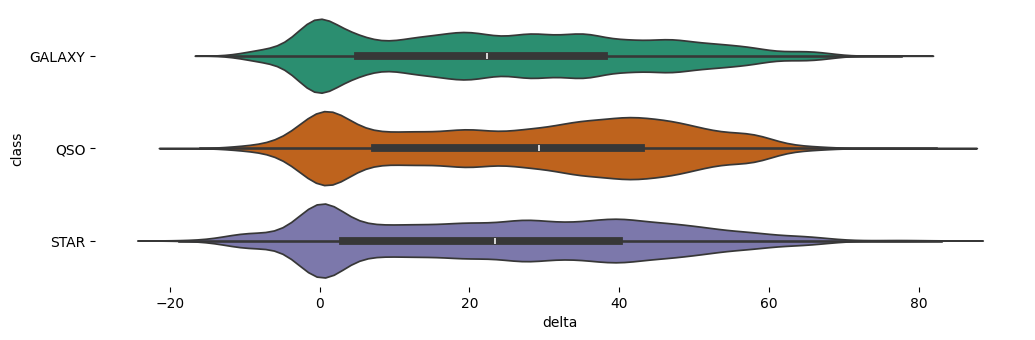

In [ ]:
#class vs delta - automatically done by Colab
figsize = (12, 1.2 * len(data['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='delta', y='class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-30-a6e3e1dfc37b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='redshift', y='class', inner='box', palette='Dark2')


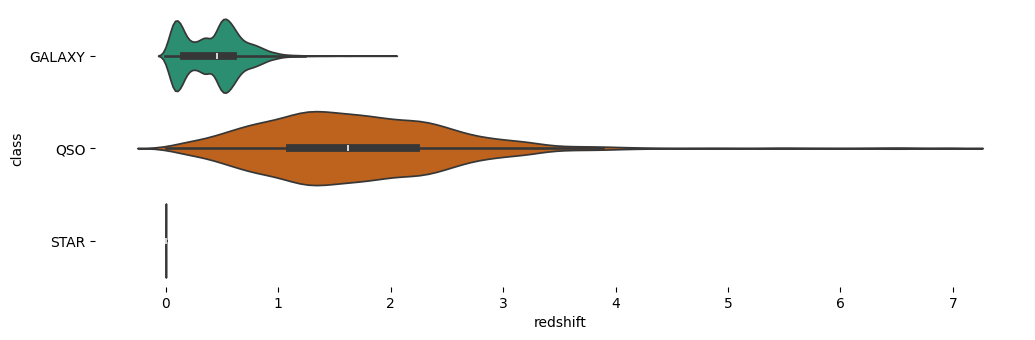

In [ ]:
#class vs redshift - made by me
figsize = (12, 1.2 * len(data['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='redshift', y='class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-4-f9aa392ff444>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='MJD', y='class', inner='box', palette='Dark2')


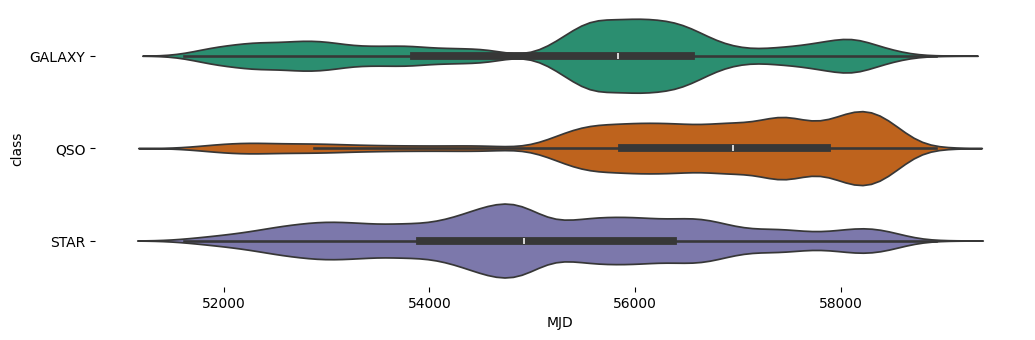

In [ ]:
#class vs MJD - made by me
figsize = (12, 1.2 * len(data['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='MJD', y='class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-5-b35a093b24d9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='plate', y='class', inner='box', palette='Dark2')


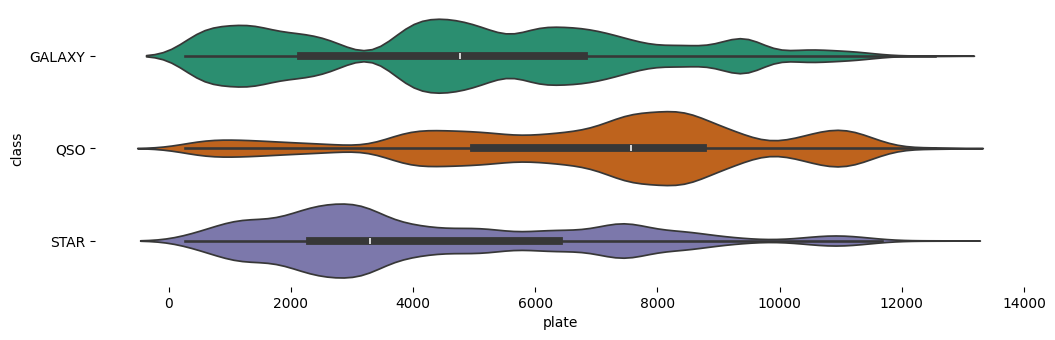

In [ ]:
#class vs plate - made by me
figsize = (12, 1.2 * len(data['class'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='plate', y='class', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Prediction

  1. The model chosen for this assignment is the Logistic Regression, with the main reason being that it is an interesting model to apply to complex amounts of data such as the one shown in this Stellar Classification dataset. Other models chosen to test are Decisions Trees and KNN Neighbours to make comparisons on the predictions to be made.



After going over the data we are going to choose our target for the predictions. In our case, we will go with class as it lends itself to easily predict based on the other features.

In [ ]:
#Feature selection
#We will start by dropping the target being class and the IDs as they only serve as identifiers and do not affect for prediction
X = data.drop(['class', 'obj_ID', 'run_ID', 'rerun_ID', 'field_ID', 'fiber_ID', 'spec_obj_ID'], axis=1)
y = data['class'].values



In [ ]:
#Scaler application, scaling the data
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#Train test split with the train size being 33% of the total dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size=0.33, random_state=3)

#Models to use
lgr = sklearn.linear_model.LogisticRegression(penalty = 'l1' ,solver = 'saga', max_iter = 900)
dt = DecisionTreeClassifier(min_samples_split=50 ,random_state=0, criterion='entropy')
kn = KNeighborsClassifier(n_neighbors=4)

Cross validation score to see the best model to use

In [ ]:
#Models being tested using cross validation

# CV for the Logistic Regression is 2 as it fails to converge at all, seems that the model doesn't fit the data at all
# As such there is no reason to make the cv bigger as we already know that regardless of what we do here, the model is underfitting
score1 = cross_val_score(lgr, X_train, y_train, cv = 2, scoring = 'accuracy').mean()
#Decision Tree
score2 = cross_val_score(dt, X_train, y_train, cv = 20, scoring = 'accuracy').mean()
#KN Neighbours
score3 = cross_val_score(kn, X_train, y_train, cv = 20, scoring = 'accuracy').mean()

print(score1)
print(score2)
print(score3)


/root/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/root/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9290303030303031
0.9706060606060605
0.9043939393939395


Decision Tree Learning and Validation Curves

First is the Learning Curve

Second is the Validation Curve

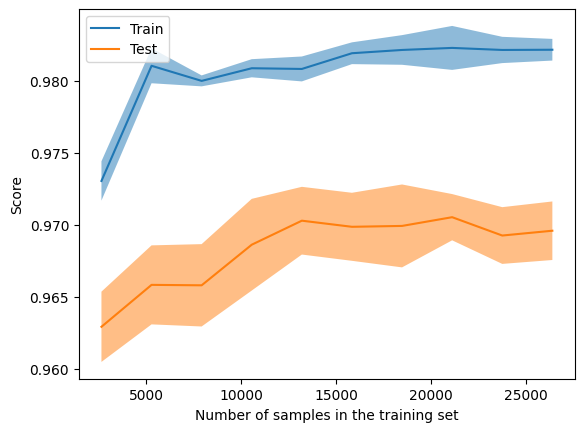

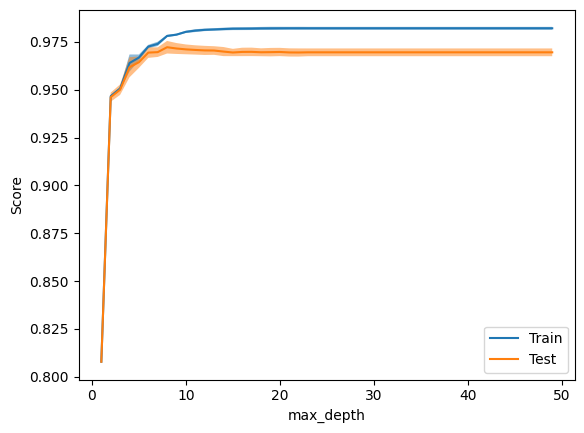

In [ ]:
LearningCurveDisplay.from_estimator(dt, X_train, y_train, train_sizes=nump.linspace(0.1, 1.0, 10), cv =5)
ValidationCurveDisplay.from_estimator(dt, X_train, y_train, param_name = "max_depth", param_range=nump.arange(1, 50), cv = 5)

Logistic Regression Learning and Validation Curves

First is the Learning Curve

Second is the Validation Curve

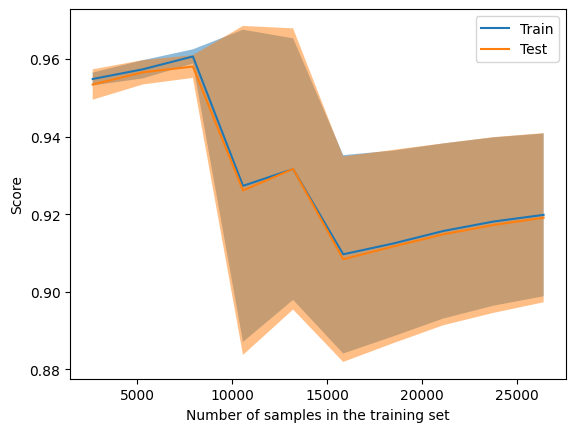

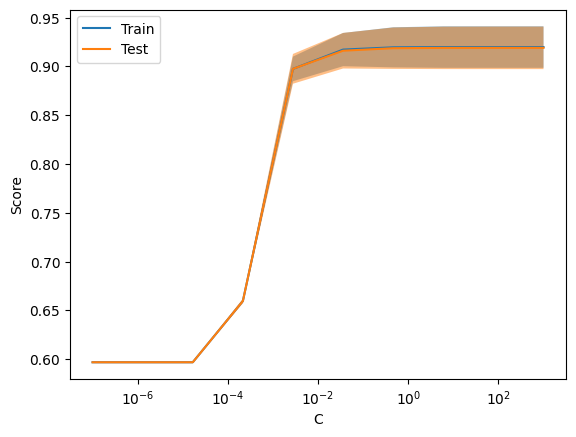

In [ ]:
#This should not be done but for the purpose of a clean notebook I will be adding it
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
#This code just launches warning after warning while executing as the Logistic Regression doesn't seem to work with this dataset per research done
LearningCurveDisplay.from_estimator(lgr, X_train, y_train, train_sizes=nump.linspace(0.1, 1.0, 10), cv =5)
ValidationCurveDisplay.from_estimator(lgr, X_train, y_train, param_name = "C", param_range=nump.logspace(-7, 3, 10), cv = 5)

KN Neighbours Learning and Validation Curves

First is the Learning Curve

Second is the Validation Curve

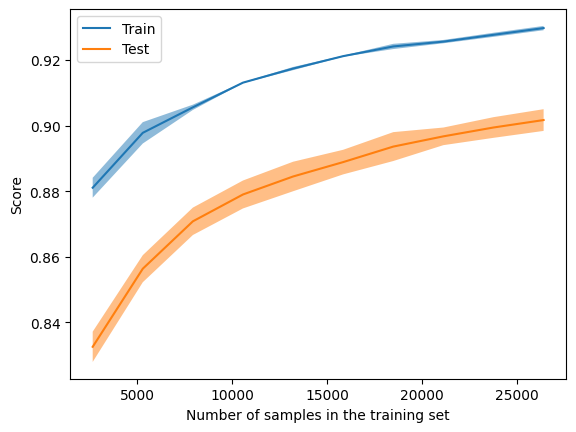

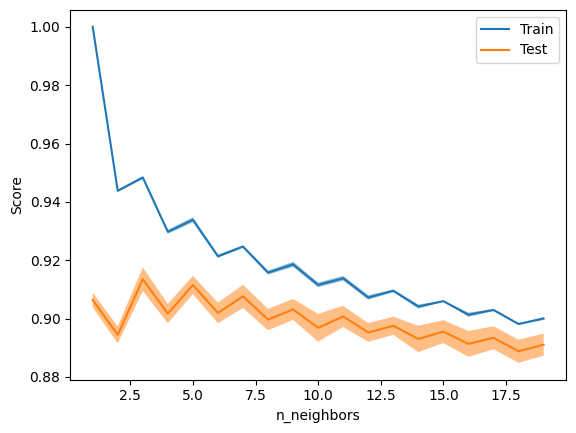

In [ ]:
LearningCurveDisplay.from_estimator(kn, X_train, y_train, train_sizes=nump.linspace(0.1, 1.0, 10), cv =5)
ValidationCurveDisplay.from_estimator(kn, X_train, y_train, param_name = "n_neighbors", param_range=nump.arange(1, 20), cv = 5)

Checking the curves, we can see that Decision Trees work pretty well with the dataset while Logistic Regression doesn't seems to be a good fit with it, with a failure to converge at any point and the data is not reliable at all. The curve shows a fall the more data is present in the training examples. Any analysis of the data is in my opinion not useful taking into consideration the lack of convergence.

The Decision Tree curves show that there no obvious overfitting or underfitting of the model, and also shows a good accuracy score for the prediction. It also shows at what point does adding depth to the tree is no longer useful, which seems to be around 8-9.

KN Neighbours show another interesting set of curves, the learning curve shows a growth of both training and testing while keeping the same distance which is good but the weird point is found at the validation curve as the it points out that choosing the 3 closest neighbours is the best that can be done for the dataset. Any more and the accuracy falls. Also it seems that for this model there is underfitting as both lines seem to go down with the more n_neighbours we have.

In [ ]:
#Prediction Decision Tree
dt.fit(X_train, y_train)
y_pred_tree = dt.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_tree))

0.972955223880597


In [ ]:
#Prediction Logistic Regression - data should not be taken too seriously
lgr.fit(X_train, y_train)
y_pred_lgr = lgr.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_lgr))

0.9105970149253731


/root/.local/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#Prediction KNeighborsClassifier
kn.fit(X_train, y_train)
y_pred_kn = kn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_kn))

0.9065820895522388


Confussion Matrixes for the models

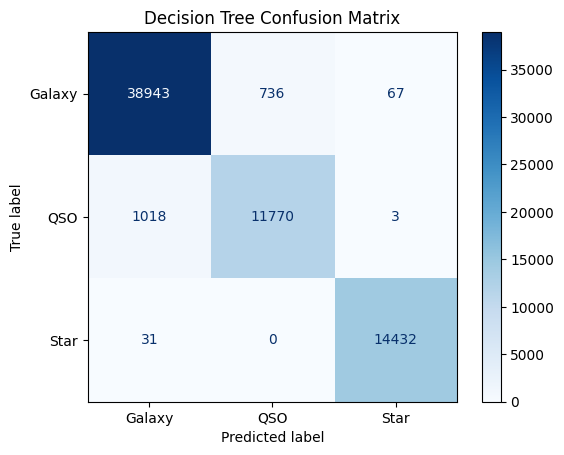

In [ ]:
#Confusion matrixes - Decision Tree
class_names = ["Galaxy", "QSO", "Star"]
dt_cm = metrics.ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, display_labels = class_names, cmap = plt.cm.Blues)
dt_cm.ax_.set_title('Decision Tree Confusion Matrix')
plt.show()

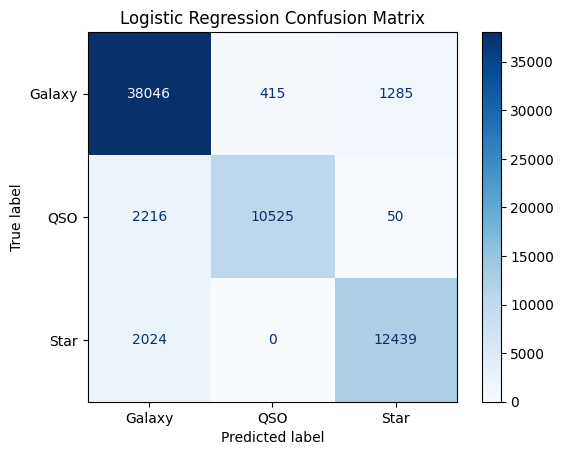

In [ ]:
#Confusion matrixes - Logistic Regression - As it doesn't converge then its results are not to be taken seriously
class_names = ["Galaxy", "QSO", "Star"]
dt_cm = metrics.ConfusionMatrixDisplay.from_estimator(lgr, X_test, y_test, display_labels = class_names, cmap = plt.cm.Blues)
dt_cm.ax_.set_title('Logistic Regression Confusion Matrix')
plt.show()

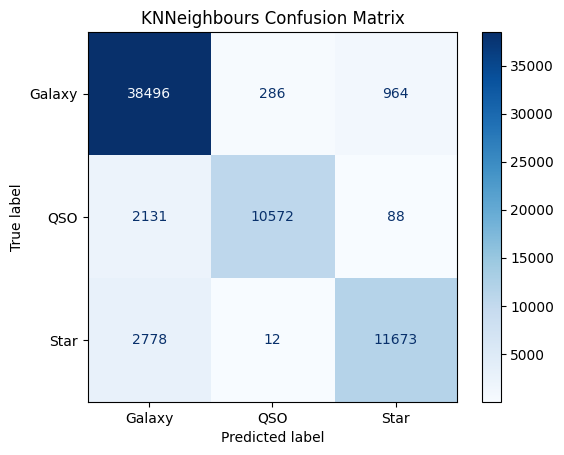

In [ ]:
#Confusion matrixes - KNNeighbours
class_names = ["Galaxy", "QSO", "Star"]
dt_cm = metrics.ConfusionMatrixDisplay.from_estimator(kn, X_test, y_test, display_labels = class_names, cmap = plt.cm.Blues)
dt_cm.ax_.set_title('KNNeighbours Confusion Matrix')
plt.show()

Conclusion

The prediction results are surprising. For one the Logistic Regression failed completely to converge at any point suffering from underfitting, further research on the topic pointed out the possibility that Logistic Regression is simply not a good fit for the dataset. This comes after applying polynomial feature to it, modifying the max_iter to over 4000, changing the penalty, and playing with some of the solvers available with no luck. Being the main point for my notebook it was quite interesting to see that and learn how a model may not be a good fit for the data that it is working with. It did make me question the following:

Can a model not suffer from underfitting but another model applied to the same data can?
I asked ChatGPT and this was the summarized answer:

In summary, while one model may not suffer from underfitting due to its complexity, another model applied to the same data may suffer from underfitting if it is too simple or not properly tuned. Underfitting is a characteristic of the model's ability to capture the underlying patterns in the data, which can vary depending on the model's complexity, feature representation, hyperparameters, and the complexity of the data itself.

How true this is I'm not sure and how accurate the answer is depends on how good ChatGPT 3.5 is but if it is then it opens some interesting questions.

On the other hand Decision Trees showed a high degree of accuracy in the prediction, with no overfitting or underfitting shown. Further research showed that models like Decision Trees and similar seem to be a great fit for the dataset, further tuning of parameters could be done to have better accuracy. With the criterion being "entropy" and the min_sample_split beign 50, we can still play with the parameters to further tune the prediction scores to be higher.  

Furthermore the confussion matrices showed that the most accurate one at predicting the correct classes is the Decision Tree model. The other models' confusion matrices show that the Logistic Regression and the KNN are somewhat accurate but still suffer from underfitting.

The last model applied was the KN Neighbours Classifier as a curious 3rd model to see how it will compare to the other models. It showed the same sympotoms of underfitting as the Logistic Regression but still managed to maintain a good accuracy at predicting the class. Parameter tuning may help with the underfitting problem but there are other factors like feature selection or normalization that may affect its results more.

As all three models work on different bases, it was interesting to see how some models failed to predict the data without suffering from under/overfitting while others are almost a perfect fit.